# Detecting Fraud on Ethereum

## Table of Contents
1. [Data Cleaning](#milestone-1-data-cleaning)
2. [Exploratory Data Analysis](#milestone-2-eda)
3. [Feature Engineering](#milestone-3-feature-engineering)
4. [Anomaly Detection](#milestone-5-anomaly-detection)
5. [Prediction Modeling and Analysis](#milestone-6-prediction-modeling-&-analysis)



## Milestone 1: Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import data from data/transactions.csv
transactions_df = pd.read_csv('data/transactions.csv')

# show summary statistics
transactions_df.describe()

,nonce,block_number,transaction_index,gas,gas_price,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,max_fee_per_blob_gas,blob_versioned_hashes
count,139255.000000,139255.000000,139255.000000,1.392550e+05,1.392550e+05,1.392550e+05,0.0,0.0,139255.0,0.0,0.0
mean,5754.232875,177011.407253,17.611784,7.571893e+04,8.028699e+10,1.441205e+09,NaN,NaN,0.0,NaN,NaN
std,7514.660700,36888.037772,31.373293,2.242644e+05,4.544315e+11,6.933802e+05,NaN,NaN,0.0,NaN,NaN
min,0.000000,100004.000000,0.000000,2.100000e+04,4.500000e+10,1.439799e+09,NaN,NaN,0.0,NaN,NaN
25%,29.000000,148528.000000,0.000000,2.100000e+04,5.000000e+10,1.440635e+09,NaN,NaN,0.0,NaN,NaN
50%,1237.000000,178829.000000,2.000000,2.500000e+04,5.000000e+10,1.441263e+09,NaN,NaN,0.0,NaN,NaN
75%,10929.000000,207847.000000,18.000000,9.000000e+04,5.466458e+10,1.441799e+09,NaN,NaN,0.0,NaN,NaN
max,27670.000000,238199.000000,148.000000,3.141592e+06,1.000000e+13,1.442326e+09,NaN,NaN,0.0,NaN,NaN


In [2]:
# create a copy of the df to explore and manipulate #
df = transactions_df.copy()

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139255 entries, 0 to 139254
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   hash                      139255 non-null  object 
 1   nonce                     139255 non-null  int64  
 2   block_hash                139255 non-null  object 
 3   block_number              139255 non-null  int64  
 4   transaction_index         139255 non-null  int64  
 5   from_address              139255 non-null  object 
 6   to_address                138322 non-null  object 
 7   value                     139255 non-null  object 
 8   gas                       139255 non-null  int64  
 9   gas_price                 139255 non-null  int64  
 10  input                     139255 non-null  object 
 11  block_timestamp           139255 non-null  int64  
 12  max_fee_per_gas           0 non-null       float64
 13  max_priority_fee_per_gas  0 non-null       f

,hash,nonce,block_hash,block_number,transaction_index,from_address,to_address,value,gas,gas_price,input,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,max_fee_per_blob_gas,blob_versioned_hashes
0,0xd133956b0ddcd58f30fcc60ed18d6f175b03b342b203...,164,0x9493fb89a5bd30ca0c49f9d821715b7eec06d6007aa1...,100405,0,0x007f7f58d3eb5b7510a301ecc749fc1fcddbe14d,0xb1abce2918e21ddb93aa452731a12672a3d9f75a,5000000000000000000,90000,60347544134,0x,1439806029,NaN,NaN,0,NaN,NaN
1,0x174b4f8118e1429581e9d8154c204f3c6d355b059971...,11,0x3c6e938bc68872a0f3b12a6226ba3da21fecd81a17c6...,100408,0,0xcd1e66ed539dd92fc40bbaa1fa16de8c02c14d45,0xe0e82ed3e93079ce76aac1da7b4bfa990d885a0d,174420874796219315407,21000,55854227910,0x,1439806081,NaN,NaN,0,NaN,NaN
2,0xba2f997aa470c83fbccf71f8f8d59dc972a4cd39e70c...,15,0x44e25aa76eb0a02fb369c20a08553b34121c2e842398...,100409,0,0x0a319a7e0c887f104359e1eee6717bd8f232d3da,0x32be343b94f860124dc4fee278fdcbd38c102d88,1780494800000000000,21000,59043039037,0x,1439806096,NaN,NaN,0,NaN,NaN
3,0x82776456a7f8d881eb28a29d4e4f898028742906e30f...,6,0x44e25aa76eb0a02fb369c20a08553b34121c2e842398...,100409,1,0x3b399ff2b96f27056ab8a7f6e028b0dbaf386279,0x32be343b94f860124dc4fee278fdcbd38c102d88,29277820729999998976,21000,59043039037,0x,1439806096,NaN,NaN,0,NaN,NaN
4,0xce9894a6cd506133f98c23781a2228c27ae1edc41648...,29,0x44e25aa76eb0a02fb369c20a08553b34121c2e842398...,100409,2,0xcf00a85f3826941e7a25bfcf9aac575d40410852,0xd9666150a9da92d9108198a4072970805a8b3428,5000000000000000000,90000,54588778004,0x,1439806096,NaN,NaN,0,NaN,NaN


In [3]:
# max_fee_per_gas & max_priority_fee_per_gas have no non null entries, this feature was added in the London Hardfork (Aug 2021) upgrade
# dropping these columns is ok
london_hardfork_columns = df[['max_fee_per_gas', 'max_priority_fee_per_gas']].isna().value_counts()
print(f"Number of entries with null max_fee_per_gas or max_priority_fee_per_gas: {london_hardfork_columns.sum()}")
df = df.drop(columns=['max_fee_per_gas', 'max_priority_fee_per_gas'])

# max_fee_per_blob_gas & blob_versioned_hashes have no non null entries, this feature will be added in the Proto-Danksharding upgrade
# dropping these columns is ok
danksharding_columns = df[['max_fee_per_blob_gas', 'blob_versioned_hashes']].isna().value_counts()
print(f"Number of entries with null max_fee_per_blob_gas or blob_versioned_hashes: {danksharding_columns.sum()}")
df = df.drop(columns=['max_fee_per_blob_gas', 'blob_versioned_hashes'])

Number of entries with null max_fee_per_gas or max_priority_fee_per_gas: 139255
Number of entries with null max_fee_per_blob_gas or blob_versioned_hashes: 139255


In [4]:
## UPDATED DATASET HAS NO MISSING VALUES FOR TO_ADDRESS AND FROM ADDRESS

# exploration of columns with null/missing values:

# to_address is missing 5/500 values, receipt_contract_address is missing 495/500
# exploration to see if this indicates directionality of the transaction

# null_to_address = df[df['to_address'].isnull()].index.tolist()
# null_receipt_address = df[df['from_address'].isnull()].index.tolist()
# print(f"Entries missing to_address: {null_to_address}")

# print("Entries missing both to_address and from_address:" + str([x for x in null_receipt_address if x in null_to_address]) + '\n')
# for idx in null_to_address:
#     receipt_address = df['from_address'].iloc[idx]
#     print(f"Receipt contract address for entry missing to_address: {receipt_address}")

# print("Number of missing receipt addresses: " + str(len(null_receipt_address)))
# print("Entries missing a to_address have a from_address, entries missing a receipt_contract_address have a to_address, these features are mutually exclusive.")

## Milestone 2: EDA
[Return to Table of Contents](#table-of-contents)

In [5]:
# Consider usable formats for features #

# Hash is a string used to identify transactions - can use index instead (?)

# what is nonce? what can this tell us about each transaction?

# BD: it's a unique number that tracks the number of transactions sent from a given address. 
# Each Ethereum account has a nonce value that increases with each transaction the account sends

# the max nonce value below shows that at least one account has sent 27671 transactions in the dataset

# HR: A question we may wish to address is whether accounts with smaller nonce are more/less likely to experience fraud? Intuition would have me think
# that accounts that make lots of transaction are "safe" - or on the flip side maybe accounts with high nonce over a short period are more likely to be fraudulent

# BD: I think this is a good question. I could buy either theory, but I think the data will show that accounts with high nonce are more likely to be fraudulent.

print(f"Max nonce: {df['nonce'].max()}")
print(f"Min nonce: {df['nonce'].min()}")
print(f"Mean nonce: {df['nonce'].mean()}")
print(f"Number of unique nonce values: {df['nonce'].nunique()}")

# Explore time stamps for frequency of transactions that contrubute to nonce
time_example = df['block_timestamp'][0]
print(f"Timestamp example entry 0: {time_example}")
timestamp_format = pd.to_datetime(time_example, unit='s')
print(f"Using timestamp format from Unix epoch: {timestamp_format}")

# Create new column to see block_timestamp in datetime format:
df['block_timestamp_dt'] = pd.to_datetime(df['block_timestamp'], unit='s')
# Create new columns to record the year, month, day, and time - good for human readability may not be useful for analysis
df['transaction_year'] = df['block_timestamp_dt'].dt.year
df['transaction_month'] = df['block_timestamp_dt'].dt.month
df['transaction_day'] = df['block_timestamp_dt'].dt.day
df['transaction_time'] = df['block_timestamp_dt'].dt.time

print('\n')
print(df['transaction_year'][:5])
print(type(df['transaction_year'][0]))
print(f"Unique transaction years: {df['transaction_year'].nunique()}")
# All transactions are from 2015

print('\n')
print(df['transaction_month'][:5])
print(type(df['transaction_month'][0]))
print(f"Unique transaction months: {df['transaction_month'].nunique()}")

print('\n')
print(df['transaction_day'][:5])
print(type(df['transaction_day'][0]))
print(f"Unique transaction days: {df['transaction_day'].nunique()}")
print('\n')

print(df.info())


Max nonce: 27670
Min nonce: 0
Mean nonce: 5754.232874941654
Number of unique nonce values: 27671
Timestamp example entry 0: 1439806029
Using timestamp format from Unix epoch: 2015-08-17 10:07:09


0    2015
1    2015
2    2015
3    2015
4    2015
Name: transaction_year, dtype: int32
<class 'numpy.int32'>
Unique transaction years: 1


0    8
1    8
2    8
3    8
4    8
Name: transaction_month, dtype: int32
<class 'numpy.int32'>
Unique transaction months: 2


0    17
1    17
2    17
3    17
4    17
Name: transaction_day, dtype: int32
<class 'numpy.int32'>
Unique transaction days: 30


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139255 entries, 0 to 139254
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   hash                139255 non-null  object        
 1   nonce               139255 non-null  int64         
 2   block_hash          139255 non-null  object        
 3   block_num

In [6]:
# explore wallets that receive lots of transactions:

print(f"Number of unique to_addresses: {df['to_address'].nunique()}")
print(f"Number of transactions in data set: {df['hash'].nunique()}")
print(f"Frequency of to_addresses: \n{df['to_address'].value_counts()}")

# to_address 0x32be343b94f860124dc4fee278fdcbd38c102d88 has 38797 transactions
counts = df['to_address'].value_counts()
percentiles = counts.quantile([0.25, 0.5, 0.75])
print(f"To address frequency percentiles:\n{percentiles}")


Number of unique to_addresses: 6754
Number of transactions in data set: 139255
Frequency of to_addresses: 
to_address
0x32be343b94f860124dc4fee278fdcbd38c102d88    38797
0x7c5080988c6d91d090c23d54740f856c69450b29     7180
0xc47aaa860008be6f65b58c6c6e02a84e666efe31     3292
0x58850ab9442c06379dffbf52e3eaa035f5d5e092     2824
0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98     2597
                                              ...  
0x89e696a97d69f05d78e3ebf78c92092c1cc80e3f        1
0x1706bf774949d89737d0723bee3ef3511ab30dad        1
0x601b2281bde506e33c74a57917e6e2d48476697e        1
0x126cc7c723d495f2f9862746573477901fdff58a        1
0xabd8567b813b501034a36b8053eb4bf0b60e4fce        1
Name: count, Length: 6754, dtype: int64
To address frequency percentiles:
0.25     1.0
0.50     2.5
0.75    13.0
Name: count, dtype: float64


In [7]:
## Exploring value

# print(df['value'][:5])
print("Counts of transactions for specified values:")
print(df['value'].value_counts())
print(f"Data type of values: {type(df['value'][0])}")
print(f"Max Value: {df['value'].max()}\n")

# Need to convert value to float
df['value'] = df['value'].astype(float)
print(f"Data type of converted values: {type(df['value'][0])}")

# What are the units for value? - values reported in WEI = 1/10^18 Ethereum

# creating value_ether feature
df['value_ether'] = df['value'] / (10 ** 18)
print(f"Max Value of Ether traded: {df['value_ether'].max()}")
print(f"Min Value of Ether traded: {df['value_ether'].min()}")

Counts of transactions for specified values:
value
0                       3337
1                       1665
1000000000000000000     1121
5000000000000000000     1066
4998950000000000000      587
                        ... 
11198605147200000000       1
1529470188490000000        1
356106298563000000         1
2278417018610000000        1
100215730000000000         1
Name: count, Length: 119223, dtype: int64
Data type of values: <class 'str'>
Max Value: 99999999999999991611392

Data type of converted values: <class 'numpy.float64'>
Max Value of Ether traded: 935800.0
Min Value of Ether traded: 0.0


In [8]:
## Exploring input

print(df['input'][:10])
print(df['input'].value_counts())
# print([x for x in df['input'] if x != '0x'])

# Drop input feature 
df = df.drop('input', axis=1)


0                      0x
1                      0x
2                      0x
3                      0x
4                      0x
5                      0x
6                      0x
7    0x454e47583939505930
8                      0x
9                      0x
Name: input, dtype: object
input
0x                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [9]:
# Exploring transaction type
print(df['transaction_type'][:5])
print(f"Number of unique transaction types: {df['transaction_year'].nunique()}")
print(df['transaction_type'].value_counts())

# only one type of transaction in dataset

0    0
1    0
2    0
3    0
4    0
Name: transaction_type, dtype: int64
Number of unique transaction types: 1
transaction_type
0    139255
Name: count, dtype: int64


### EDA Graphs

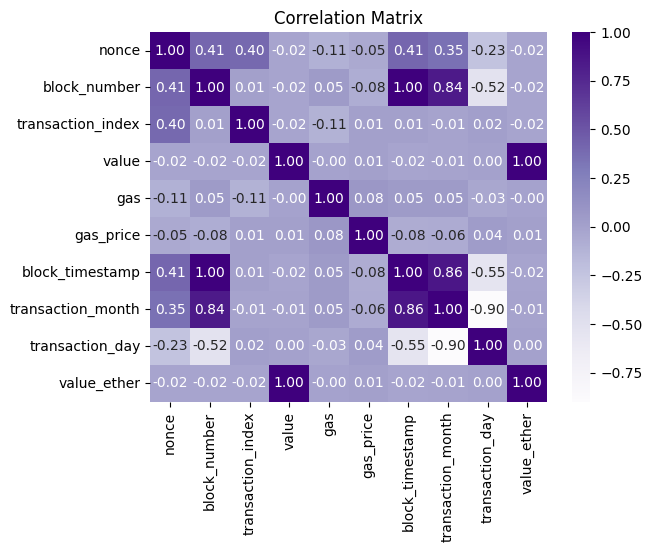

In [10]:
# Exploring feature correlations

# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# If needed, drop any specific columns (like 'transaction_year', 'transaction_type') from the correlation matrix
columns_to_exclude = ['transaction_year', 'transaction_type']
numeric_df = numeric_df.drop(columns=columns_to_exclude, errors='ignore')

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix heatmap
sns.heatmap(corr_matrix, cmap='Purples', annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

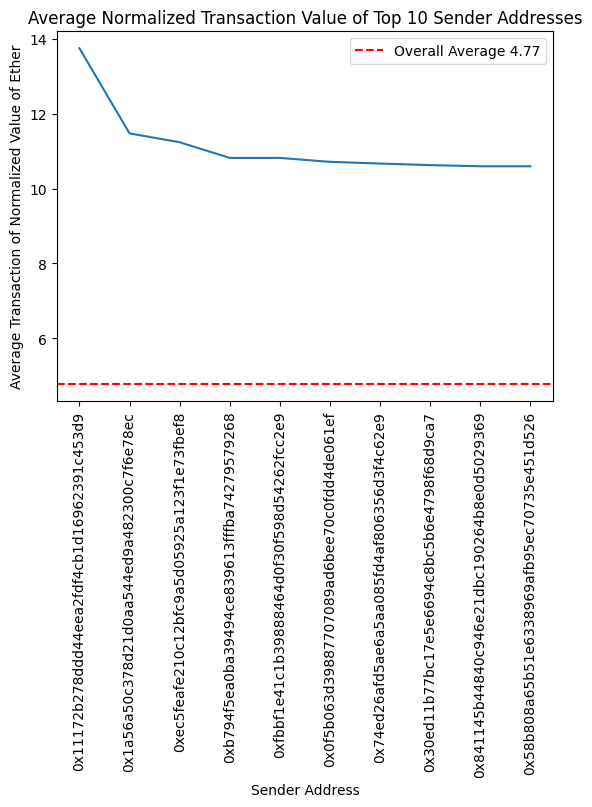

In [11]:
# Find the 10 senders with the highest average transaction value

senders = df.groupby('from_address')['value_ether'].mean().reset_index()
senders.columns = ['from_address', 'average_value_ether']
senders['log_av_value_ether'] = np.log1p(senders['average_value_ether'])
top_10_addresses = senders.sort_values(by='log_av_value_ether', ascending=False).head(10)

av_value = df['value_ether'].mean()
log_av_value = np.log1p(av_value)

plt.plot(top_10_addresses['from_address'], top_10_addresses['log_av_value_ether'])
plt.axhline(y=log_av_value, color='r', linestyle='--', label=f'Overall Average {log_av_value:.2f}')
plt.xlabel("Sender Address")
plt.ylabel("Average Transaction of Normalized Value of Ether")
plt.title("Average Normalized Transaction Value of Top 10 Sender Addresses")
plt.xticks(rotation=90)
plt.legend()
plt.show()

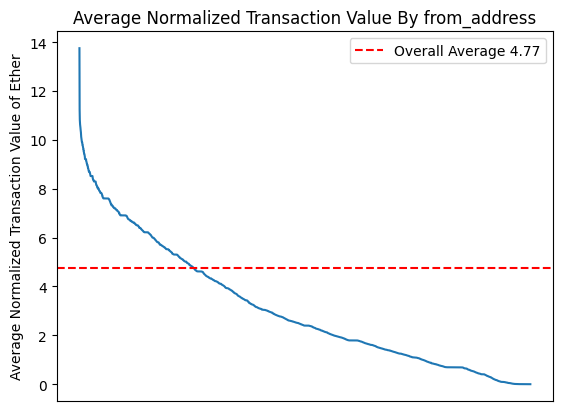

In [12]:
all_addresses = senders.sort_values(by='log_av_value_ether', ascending=False)

plt.plot(all_addresses['from_address'], all_addresses['log_av_value_ether'])
plt.axhline(y=log_av_value, color='r', linestyle='--', label=f'Overall Average {log_av_value:.2f}')
plt.ylabel("Average Normalized Transaction Value of Ether")
plt.title("Average Normalized Transaction Value By from_address")
plt.xticks([])
plt.legend()
plt.show()

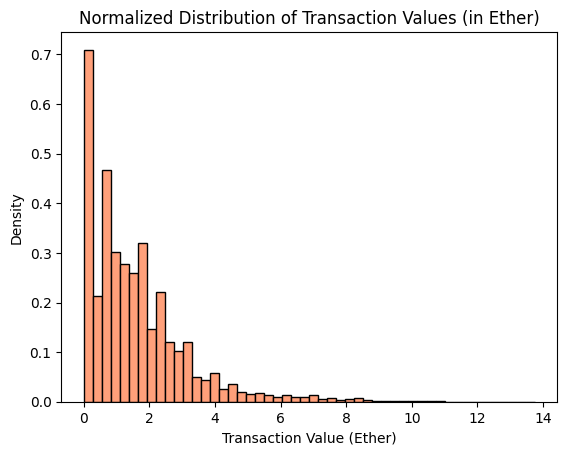

In [13]:
# Log normalization to reduce range impact
df['log_value_ether'] = np.log1p(df['value_ether'])

# Plot normalized distribution
df['log_value_ether'].plot(kind='hist', bins=50, density=True, color='LightSalmon', linewidth=1, edgecolor='black', title='Normalized Distribution of Transaction Values (in Ether)')
plt.xlabel('Transaction Value (Ether)')
plt.ylabel('Density')
plt.show()

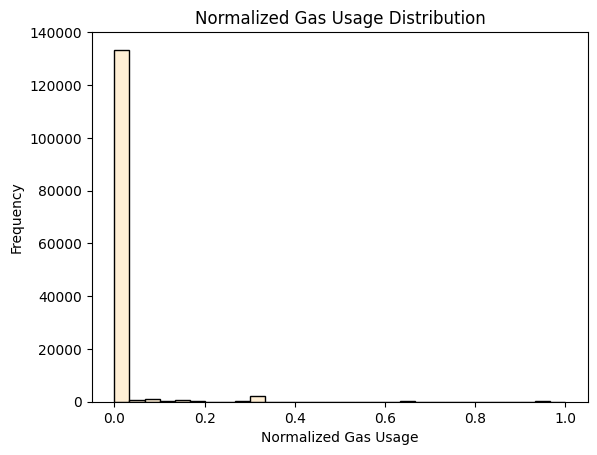

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['norm_gas'] = scaler.fit_transform(df[['gas']])

# Plot normalized gas usage
df['norm_gas'].plot(kind='hist', bins=30, color='PapayaWhip', linewidth=1, edgecolor='black', title='Normalized Gas Usage Distribution')
plt.xlabel('Normalized Gas Usage')
plt.show()

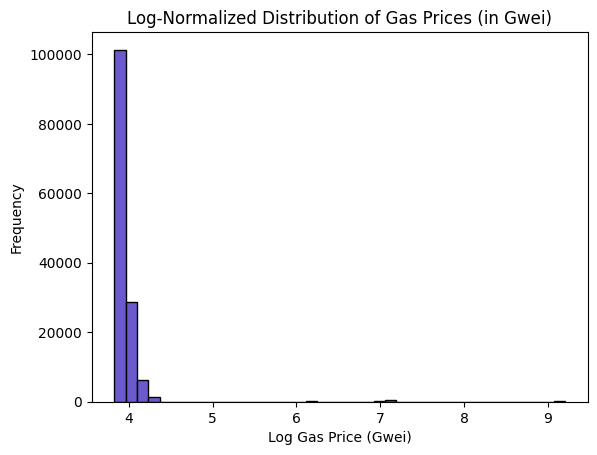

In [15]:
# Convert gas price from wei to gwei for easier interpretation
df['gas_price_gwei'] = df['gas_price'].astype(float) / 10**9

df['log_gas_price_gwei'] = np.log1p(df['gas_price_gwei'])

# Plot normalized gas prices
df['log_gas_price_gwei'].plot(kind='hist', bins=40, color='SlateBlue', linewidth=1, edgecolor='black', title='Log-Normalized Distribution of Gas Prices (in Gwei)')
plt.xlabel('Log Gas Price (Gwei)')
plt.show()


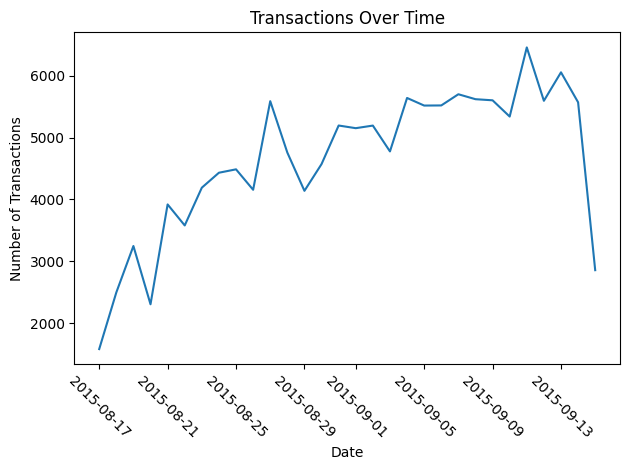

In [16]:
# Convert timestamp to datetime for better readability
df['datetime'] = pd.to_datetime(df['block_timestamp'], unit='s')

# Group by date and count transactions per day
transactions_per_day = df.groupby(df['datetime'].dt.date).size()

# Plot transactions over time with diagonal date labels
transactions_per_day.plot(title='Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=-45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()       # Adjust layout to prevent clipping
plt.show()

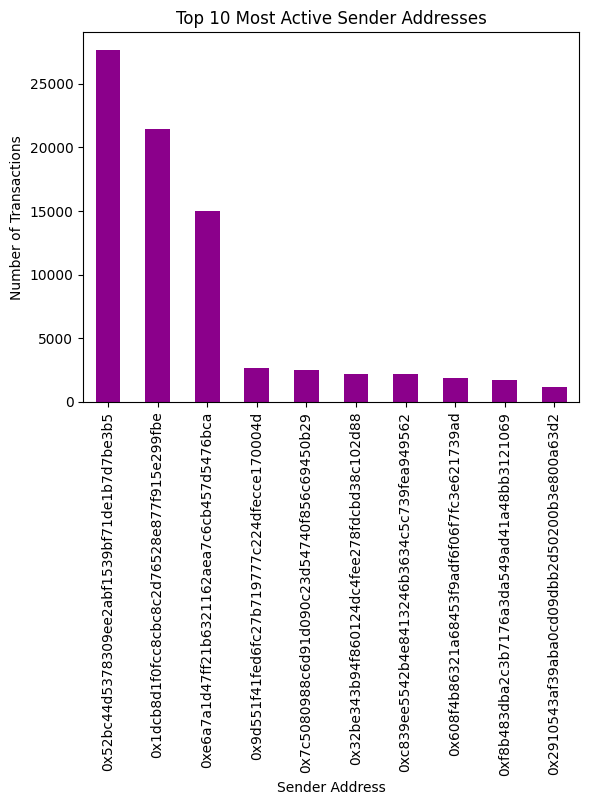

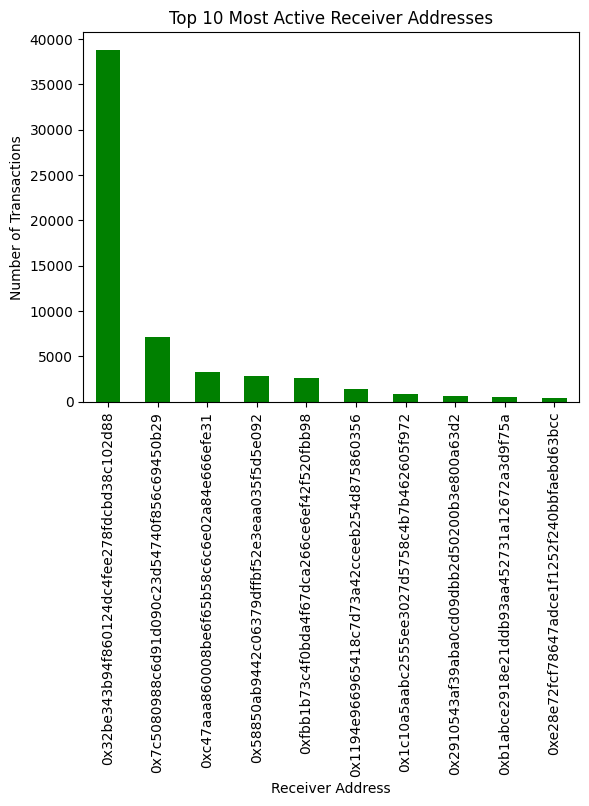

In [17]:
# Most active sender addresses
top_senders = df['from_address'].value_counts().head(10)
top_senders.plot(kind='bar', color='DarkMagenta', title='Top 10 Most Active Sender Addresses')
plt.xlabel('Sender Address')
plt.ylabel('Number of Transactions')
plt.show()

# Most active receiver addresses
top_receivers = df['to_address'].value_counts().head(10)
top_receivers.plot(kind='bar', color='green', title='Top 10 Most Active Receiver Addresses')
plt.xlabel('Receiver Address')
plt.ylabel('Number of Transactions')
plt.show()

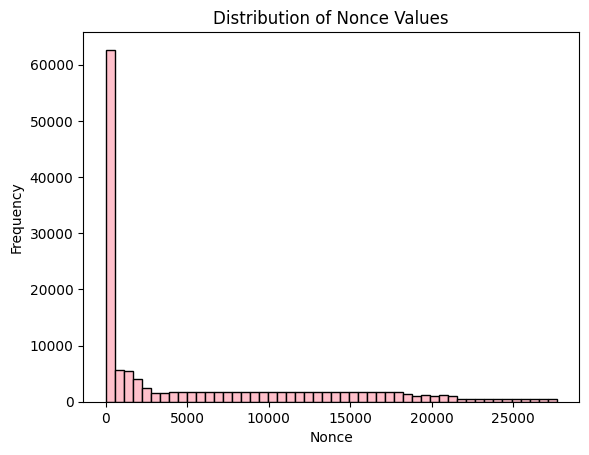

In [18]:
# Nonce distribution
# Nonce is a unique number that tracks the number of transactions sent from a given address. 
# Each Ethereum account has a nonce value that increases with each transaction the account sends

df['nonce'].plot(kind='hist', bins=50, color='pink', linewidth=1, edgecolor='black', title='Distribution of Nonce Values')
plt.xlabel('Nonce')
plt.show()


In [19]:
# Number of unique from and to addresses in dataset

unique_from_addresses = df['from_address'].nunique()
unique_to_addresses = df['to_address'].nunique()
print(f"Unique from_addresses: {unique_from_addresses}")
print(f"Unique to_addresses: {unique_to_addresses}")

Unique from_addresses: 4942
Unique to_addresses: 6754


## Milestone 3: Feature Engineering
[Return to Table of Contents](#table-of-contents)

### Frequency and Value of Transactions
Additional features that give us insights into the dataset and allow us to identify potentially fraudulent activity include information in regards to the frequency and values of transactions. 

The goal of these features was to give us metrics about each wallet address. 
- `from_frequency`: how many transactions were sent by this wallet address. 
- `to_frequency`: how many transactions were received by this wallet. 
- `total_frequency`: how active this wallet address is by telling us how many total transactions were processed by this wallet address. 
- `from_val_total` and `to_val_total`: the total amount of ETH sent and received from this wallet address, respectively. 
- `avg_value_sent` and `avg_value_received`:average value of each outgoing and incoming transaction. 

This information is useful for analyzing the behavior of each wallet address and provides data that helps us to generate statistical measures for the dataset as a whole. Using these metrics, we are able to generate an overall 'expected' behavior that can act as guidelines for flagging potentially fraudulent activity. In order to generate these statistics, it was important to filter out the values where the value sent or received was 0, as this shows the direction of the transaction (if the from value is zero, the to value is nonzero and vice versa).

Other features that we engineered pay attention to the gas price charged and gas used for transactions. Gas is a fee for executing these transactions in GWEI. In this dataset, gas refers to the number of gas units per transaction, and gas price is the amount of GWEI paid per unit of gas. Note that GWEI is $\frac{1}{10}^{18}$ ETH, and the features that we generated regarding gas price is converted to ETH. 

Intuitively, transactions with high gas might indicate fraud because when an individual sets a high gas fee that they are willing to pay, ensures that the transactions are prioritized and successful. Pump and dump schemes also often lead to spikes in gas fees. When executing transactions through a centralized exchange, the exchange includes the fees and gas considerations in the transaction fee, whereas executing transactions through the Ethereum network directly allows the user to set the gas fee. It would make sense intuitively that transactions that occur over the Ethereum network directly are more likely to be fraudulent than transactions that occur through a centralized exchange. 

#### ?? Include/exclude? IDK: 
We created an additional dataframe to reduce the dimensions to these particular metrics, allowing for further exploration of the behavior for each wallet address.

### Interesting notes:

- The maximum average value sent from a single wallet is 935800.0ETH. The price of ETH during between 8/17/2015-9/13/2015 was between 0.87 and 1.35USD, therefore, 935800.0ETH during this time period was 814,146 - 1,263,330USD. (source:   https://coinmarketcap.com/currencies/ethereum/historical-data/) This wallet could have only transaction that contributed to this average, however, this is likely an outlier, since 75% of the data has average sent values of 126.652167ETH or less. Since this value is far from the mean and most other data points, it could help be analyzed in more detail in order to identify if it could be fraudulent.
- The three wallet addresses that are displayed in the first 3 indices of the new dataframe have interesting values. First, the actual wallet addresses are interesting and represent potentially "placeholder" or testing wallets. The first wallet only received ETH, with the average value of each transaction it received being about 2ETH or somewhere between about  \$1.74 to \$2.70. The other two top wallet addresses processed fewer transactions with even smaller amounts. It is important to keep in mind the time period that this dataset represents. Currently, our data includes transactions between 8/17/2015 and 9/13/2015.
- The gas price for sent and received transactions are very similar, however, the amount of gas units used to send transactions is higher than the amount of gas used when receiving transactions. This could be due to computational complexity lying on the wallet that initiates the transaction.


In [20]:
# Create new features based on frequency and value of transactions
from_frequency = df['from_address'].value_counts()
to_frequency = df['to_address'].value_counts()

# Create new features based on total value of transactions
from_val_total = df.groupby('from_address')['value_ether'].sum()
to_val_total = df.groupby('to_address')['value_ether'].sum()

# Create new dataframe with frequency and value features
transaction_freq = pd.DataFrame({
    'from_frequency': from_frequency,
    'to_frequency': to_frequency,
    'from_val_total': from_val_total,
    'to_val_total': to_val_total
}).fillna(0)

# Create new feature for total frequency of transactions
transaction_freq['total_frequency'] = transaction_freq['from_frequency'] + transaction_freq['to_frequency']
transaction_freq['avg_value_sent'] = (transaction_freq['from_val_total'] / transaction_freq['from_frequency']).fillna(0)
transaction_freq['avg_value_received'] = (transaction_freq['to_val_total'] / transaction_freq['to_frequency']).fillna(0)


# Generating statistic metrics for full dataset 

## These metrics include values of 0 for sent/received ##
# print("Metrics for average value sent across full dataset:")
# print(transaction_freq['avg_value_sent'].describe())

# print("\nMetrics for average value received across full dataset:")
# print(transaction_freq['avg_value_received'].describe())
#########################################################

print("Metrics for average value sent across full dataset, excluding sent values of 0:")
filtered_df = transaction_freq[transaction_freq['avg_value_sent'] != 0]
mean_avg_sent = filtered_df['avg_value_sent'].mean()
quantiles_avg_sent = filtered_df['avg_value_sent'].quantile([0.25, 0.5, 0.75])
avg_value_sent_min = filtered_df['avg_value_sent'].min()
avg_value_sent_max = filtered_df['avg_value_sent'].max()

print(f"Mean avg_value_sent: {mean_avg_sent}")
print(f"Quartiles of avg_value_sent:\n{quantiles_avg_sent}")
print(f"Min avg_value_sent: {avg_value_sent_min}")
print(f"Max avg_value_sent: {avg_value_sent_max}")


print("\nMetrics for average value received across full dataset, excluding received values of 0:")
filtered_df = transaction_freq[transaction_freq['avg_value_received'] != 0]
mean_avg_received = filtered_df['avg_value_received'].mean()
quantiles_avg_received = filtered_df['avg_value_received'].quantile([0.25, 0.5, 0.75])
avg_value_rec_min = filtered_df['avg_value_received'].min()
avg_value_rec_max = filtered_df['avg_value_received'].max()

print(f"Mean avg_value_received: {mean_avg_received}")
print(f"Quartiles of avg_value_received:\n{quantiles_avg_received}")
print(f"Min avg_value_received: {avg_value_rec_min}")
print(f"Max avg_value_received: {avg_value_rec_max}")

# Generate average transaction frequencies
print("\n")
print("Average number of transactions sent: ", transaction_freq['from_frequency'].mean())
print("Average number of transactions received: ", transaction_freq['to_frequency'].mean())




# Create new features based on total gas for transactions
transaction_freq['from_gas_total'] = df.groupby('from_address')['gas'].sum()
transaction_freq['to_gas_total'] = df.groupby('to_address')['gas'].sum()

# Create new features for gas
transaction_freq['avg_gas_sent'] = df.groupby('from_address')['gas'].mean()
transaction_freq['avg_gas_price_sent'] = df.groupby('from_address')['gas_price'].mean() / (10**18) # converts GWEI to ETH
transaction_freq['avg_gas_received'] = df.groupby('to_address')['gas'].mean()
transaction_freq['avg_gas_price_received'] = df.groupby('to_address')['gas_price'].mean() / (10**18) # converts GWEI to ETH

transaction_freq.fillna(0, inplace=True)



print("\nMetrics for average gas price sent across full dataset, excluding sent values of 0:")
filtered_df = transaction_freq[transaction_freq['avg_gas_price_sent'] != 0]
mean_avg_gasprice_sent = filtered_df['avg_gas_price_sent'].mean()
quantiles_avg_gasprice_sent = filtered_df['avg_gas_price_sent'].quantile([0.25, 0.5, 0.75])
avg_gasprice_sent_min = filtered_df['avg_gas_price_sent'].min()
avg_gasprice_sent_max = filtered_df['avg_gas_price_sent'].max()

print(f"Mean average gas_price sent: {mean_avg_gasprice_sent}")
print(f"Quartiles of avg_gasprice_sent:\n{quantiles_avg_gasprice_sent}")
print(f"Min avg_gasprice_sent: {avg_gasprice_sent_min}")
print(f"Max avg_gasprice_sent: {avg_gasprice_sent_max}")


print("\nMetrics for average gas price received across full dataset, excluding received values of 0:")
filtered_df = transaction_freq[transaction_freq['avg_gas_price_received'] != 0]
mean_avg_gasprice_received = filtered_df['avg_gas_price_received'].mean()
quantiles_avg_gasprice_received = filtered_df['avg_gas_price_received'].quantile([0.25, 0.5, 0.75])
avg_gasprice_rec_min = filtered_df['avg_gas_price_received'].min()
avg_gasprice_rec_max = filtered_df['avg_gas_price_received'].max()

print(f"Mean average gas_price received: {mean_avg_gasprice_received}")
print(f"Quartiles of avg_gasprice_received:\n{quantiles_avg_gasprice_received}")
print(f"Min avg_value_sent: {avg_gasprice_rec_min}")
print(f"Max avg_value_sent: {avg_gasprice_rec_max}")

# Generate average gas prices
print("\n")
print("Average gas price for sent transactions: ", transaction_freq['avg_gas_price_received'].mean())
print("Average gas used for sent transactions: ", transaction_freq['avg_gas_received'].mean())

print("Average gas price for received transactions: ", transaction_freq['avg_gas_price_sent'].mean())
print("Average gas used for received transactions: ", transaction_freq['avg_gas_sent'].mean())


# Print the resulting dataframe
transaction_freq.head(10)


# TODO: why is from_value_total and to_value_total in different formats?

Metrics for average value sent across full dataset, excluding sent values of 0:
Mean avg_value_sent: 828.4522638727187
Quartiles of avg_value_sent:
0.25      2.000000
0.50     10.434423
0.75    126.652167
Name: avg_value_sent, dtype: float64
Min avg_value_sent: 1e-18
Max avg_value_sent: 935800.0

Metrics for average value received across full dataset, excluding received values of 0:
Mean avg_value_received: 712.481294231595
Quartiles of avg_value_received:
0.25     0.839469
0.50     3.280775
0.75    36.265046
Name: avg_value_received, dtype: float64
Min avg_value_received: 3.3333333333333334e-19
Max avg_value_received: 323203.43600000005


Average number of transactions sent:  17.857784047191586
Average number of transactions received:  17.738137984098486

Metrics for average gas price sent across full dataset, excluding sent values of 0:
Mean average gas_price sent: 1.7115124410313154e-07
Quartiles of avg_gasprice_sent:
0.25    5.000000e-08
0.50    5.230605e-08
0.75    5.665588e-08
Na

,from_frequency,to_frequency,from_val_total,to_val_total,total_frequency,avg_value_sent,avg_value_received,from_gas_total,to_gas_total,avg_gas_sent,avg_gas_price_sent,avg_gas_received,avg_gas_price_received
0x0000000000000000000000000000000000000000,0.0,23.0,0.00000,4.666256e+01,23.0,0.00000,2.028807e+00,0.0,4192647.0,0.0,0.000000e+00,182289.0,2.861629e-06
0x0000000000000000000000000000000000000001,0.0,1.0,0.00000,0.000000e+00,1.0,0.00000,0.000000e+00,0.0,300000.0,0.0,0.000000e+00,300000.0,5.000000e-08
0x0000000000000000000000000000000000000123,0.0,1.0,0.00000,3.500000e-17,1.0,0.00000,3.500000e-17,0.0,90000.0,0.0,0.000000e+00,90000.0,5.000000e-08
0x00000000742a16c2ccfdf3a6fde782e6e95b4120,0.0,1.0,0.00000,9.884823e-03,1.0,0.00000,9.884823e-03,0.0,90000.0,0.0,0.000000e+00,90000.0,5.000000e-08
0x0001be2782b76273093874aa372870ce6e418b22,1.0,1.0,1.00895,1.010000e+00,2.0,1.00895,1.010000e+00,21000.0,21000.0,21000.0,5.000000e-08,21000.0,5.000000e-08
0x000239e7bab976a47346550bad06a9fe4f224736,0.0,2.0,0.00000,2.921098e+00,2.0,0.00000,1.460549e+00,0.0,180000.0,0.0,0.000000e+00,90000.0,5.245004e-08
0x000292305ef9522d7a87b95e41134064ae46910c,0.0,1.0,0.00000,1.237662e+00,1.0,0.00000,1.237662e+00,0.0,90000.0,0.0,0.000000e+00,90000.0,5.795764e-08
0x0004b15be8cb573a7be023e203e268dbcffd302b,1.0,4.0,1.00000,5.166461e+03,5.0,1.00000,1.291615e+03,90000.0,84000.0,90000.0,5.882940e-08,21000.0,5.681404e-08
0x000620e7d3285077e88b9a10462563873037ca68,0.0,1.0,0.00000,5.000000e-01,1.0,0.00000,5.000000e-01,0.0,90000.0,0.0,0.000000e+00,90000.0,5.000000e-08
0x0007ca35a2680425974312233a59a74c00d3c040,5.0,1.0,1.90000,1.995000e+00,6.0,0.38000,1.995000e+00,2100000.0,21000.0,420000.0,5.000000e-08,21000.0,5.587068e-08


In [21]:
# burstiness score
# TODO: how do we make it consistent across all timeframes and addresses?

### Distinct Counterparties

In order to explore the most prominent wallets addresses from this time period, we engineered several features regarding distinct counterparties. We identified which wallet addresses are involved in transactions together. We generated a new dataframe with a `from_unique` feature that identifies the number of wallet addresses that each wallet sends transactions to and the `to_unique` feature counts the number of wallets that each wallet receives transactions from. 

We explored the 10 wallet addresses that send transactions to the highest number of distinct wallet addresses as well as the 10 wallet addresses that receive transactions from the most wallet addresses. These could help us to identify businesses or potentially to classify and characterize wallet types. By exploring which wallets frequently make transactions with themselves, we could generate a baseline for expected self transaction behavior.

In [21]:
# distinct counterparties

from_unique = df.groupby('from_address')['to_address'].nunique()
to_unique = df.groupby('to_address')['from_address'].nunique()

distinct_counterparties = pd.DataFrame({
    'from_unique': from_unique,
    'to_unique': to_unique
}).fillna(0)



In [22]:
# distinct top 10 senders
top10senders = distinct_counterparties.sort_values(by='to_unique', ascending=False).head(10)

top10senders

,from_unique,to_unique
0x32be343b94f860124dc4fee278fdcbd38c102d88,804.0,1562.0
0xc47aaa860008be6f65b58c6c6e02a84e666efe31,188.0,373.0
0x2910543af39aba0cd09dbb2d50200b3e800a63d2,441.0,321.0
0xe28e72fcf78647adce1f1252f240bbfaebd63bcc,0.0,265.0
0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,238.0,261.0
0x120a270bbc009644e35f0bb6ab13f95b8199c4ad,340.0,168.0
0xc597a5d92f5dc1137d847db733cfe02c6d209f13,47.0,69.0
0x9b0a028eafdecde3afc0fd00b7937098388b7c8a,32.0,50.0
0x7011f3edc7fa43c81440f9f43a6458174113b162,0.0,42.0
0xbc292e2d6b9e923eadb86db1d920721276239104,1.0,33.0


In [23]:
# distinct top 10 receivers
top10receivers = distinct_counterparties.sort_values(by='from_unique', ascending=False).head(10)

top10receivers

,from_unique,to_unique
0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5,1534.0,2.0
0xe6a7a1d47ff21b6321162aea7c6cb457d5476bca,1067.0,8.0
0x32be343b94f860124dc4fee278fdcbd38c102d88,804.0,1562.0
0x1dcb8d1f0fcc8cbc8c2d76528e877f915e299fbe,656.0,0.0
0x9d551f41fed6fc27b719777c224dfecce170004d,493.0,0.0
0x2910543af39aba0cd09dbb2d50200b3e800a63d2,441.0,321.0
0x120a270bbc009644e35f0bb6ab13f95b8199c4ad,340.0,168.0
0xf8b483dba2c3b7176a3da549ad41a48bb3121069,263.0,0.0
0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,238.0,261.0
0xc47aaa860008be6f65b58c6c6e02a84e666efe31,188.0,373.0


In [24]:
# self_transactions

# TODO: loop back around to transaction_type that we dropped earlier. in other dataset windows, we may 
# be able to get a value other than 0 which may be useful here.

self_transactions = df[df['from_address'] == df['to_address']]

# Create the DataFrame with the required aggregations
wallet_summary = self_transactions.groupby('from_address').agg(
    number_self_transactions=('from_address', 'size'),
    average_gas_used=('gas', 'mean'),
    average_gas_price=('gas_price', 'mean'),
    average_value_ether=('value_ether', 'mean'),
    first_nonce=('nonce', 'first')
).reset_index()

# Display the resulting DataFrame
wallet_summary

,from_address,number_self_transactions,average_gas_used,average_gas_price,average_value_ether,first_nonce
0,0x0bcba20fb3562fbcaf7c299fbcf7d2590479a3da,1,90000.0,5.000000e+10,4.000000e+00,7
1,0x13f26856cbacaaba9c4488a31c72e605fae029fc,3,90000.0,5.519929e+10,0.000000e+00,11
2,0x173d1d46122c64d110db74a0c4e9f4ee82a7c195,1,21000.0,5.000000e+10,1.000000e-03,0
3,0x1c10a5aabc2555ee3027d5758c4b7b462605f972,4,21000.0,5.000000e+10,1.062002e-02,58
4,0x20dff602d440dc119bd3ff52e76f5cfe42da65fe,3,90000.0,5.074844e+10,0.000000e+00,2
5,0x2e1a591a3bd5fce3c1e095c205bd202c29541e70,1,90000.0,5.000000e+10,1.000000e-01,10
6,0x2fda34cb6c13420ba8b8af3cb1ba4f7cbb167821,1,90000.0,5.853741e+10,1.000000e-01,1
7,0x37497c3ce80933a1587dfb3b09d2b9ccf747b6ac,6,90000.0,5.000000e+10,6.551366e-06,51
8,0x3b7a128d5ae8ee2483dcff521277d00ef481369e,1,90000.0,5.000000e+10,1.000000e-02,14
9,0x3c770607ee15cffef99672722845b0c397130abd,13,25000.0,5.392144e+10,1.015385e+00,2


## Milestone 5: Anomaly Detection
[Return to Table of Contents](#table-of-contents)

In [ ]:
# TODO

## Milestone 6: Prediction Modeling & Analysis
[Return to Table of Contents](#table-of-contents)

In [ ]:
# TODO